<div style="
    background: linear-gradient(140deg, #0f0f0f 0%, #121212 40%, #1DB954 140%);
    padding: 40px 20px 45px 20px;
    border-radius: 18px;
    text-align: center;
    margin-top: 10px;
    margin-bottom: 25px;
    box-shadow: 0 10px 35px rgba(0,0,0,0.6);
    width: 97%;
"

<img src="logo.png" width="90" style="margin-bottom:18px; filter: drop-shadow(0px 6px 10px rgba(29,185,84,0.6));">
<!-- <img src="logo-spotify.jpg" width="90" style="margin-bottom:18px; filter: drop-shadow(0px 6px 10px rgba(29,185,84,0.6));"> -->


<div style="
    font-size: 2.6em;
    font-weight: 800;
    letter-spacing: 1px;
    color: white;
    margin-bottom: 8px;
">
    Análise de Dados
</div>

<div style="
    font-size: 3.2em;
    font-weight: 900;
    color: #1DB954;
    text-shadow: 0px 0px 18px rgba(29,185,84,0.45);
">
    Spotify
</div>

<div style="
    margin-top: 14px;
    color: #b3b3b3;
    font-size: 1.05em;
">
    Exploração e Insights sobre comportamento musical
</div>

</div>


<div style="
    background: linear-gradient(145deg, #121212 0%, #181818 60%, #1DB95422 140%);
    padding: 26px 28px;
    border-radius: 16px;
    margin-top: 20px;
    width: 97%;
    color: #EAEAEA;
    box-shadow: 0 8px 22px rgba(0,0,0,0.55);
">

<div style="
    font-size: 1.9em;
    font-weight: 800;
    color: #1DB954;
margin-bottom: 10px;
">
    🎧 Arquivo 1 — Dados de Streaming
</div>

<div style="
    font-size: 1.2em;
    font-weight: 600;
    color: #FFFFFF;
    margin-bottom: 18px;
">
    Diferenças entre os arquivos baixados
</div>

<div style="line-height:1.7;">

<div style="margin-bottom:14px;">
    <span style="color:#1DB954; font-weight:700;">Streaming_History_Audio[...]</span><br>
    Histórico de conteúdos em áudio: músicas, podcasts e audiobooks.
    <ul style="margin-top:8px;">
        <li>Músicas → <i>track_name</i> preenchido</li>
        <li>Podcasts → <i>episode_name</i> preenchido</li>
        <li>Contém métricas: <i>ms_played</i>, <i>shuffle</i>, <i>skipped</i></li>
        <li>O sufixo indica os anos e a partição dos dados</li>
    </ul>
</div>

<div style="margin-bottom:14px;">
    <span style="color:#1DB954; font-weight:700;">Streaming_History_Video[...]</span><br>
    Histórico de conteúdos em vídeo: podcasts com vídeo, clipes e conteúdo visual.
    <ul style="margin-top:8px;">
        <li>Muitas vezes sem música (<i>track_name = null</i>)</li>
        <li><i>ms_played</i> geralmente muito maior</li>
    </ul>
</div>

<div style="
    margin-top:18px;
    padding:14px;
    border-radius:10px;
    background:#1DB95418;
    border-left:5px solid #1DB954;
    font-weight:600;
">
    📊 Nesta análise serão utilizados apenas os dados de <b>áudio</b>.
</div>

</div>

</div>


### Bibliotecas

In [43]:

# Importar bibliotecas
import pandas as pd
import json
import glob
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


### Tratamento da base

In [44]:
# Puxando arquivos de áudio 
audio_files = glob.glob("Streaming_History_Audio*.json")

dfs = []

for file in audio_files:
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
        df_temp = pd.DataFrame(data)
        df_temp["source_file"] = file  # opcional
        dfs.append(df_temp)


# Mesclando áudios 
df_audio = pd.concat(dfs, ignore_index=True)


# Mostrando o dataframe final de áudio
df_audio.head(5)


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,source_file
0,2020-05-28T18:25:04Z,"Android OS 10 API 29 (motorola, motorola one v...",144661,BR,177.64.41.23,Besta Enjaulada (Beat Cr7),PES MIL GRAU,Besta Enjaulada (Beat Cr7),spotify:track:5oa9NYBS60fsmIO764HfkK,None,...,None,None,playbtn,trackdone,False,False,False,NaN,False,Streaming_History_Audio_2020-2021_0.json
1,2020-05-28T18:27:48Z,"Android OS 10 API 29 (motorola, motorola one v...",161684,BR,177.64.41.23,Deixa,Mc Th,Deixa,spotify:track:4zZ2rPOa8itw3VuusVSicv,None,...,None,None,playbtn,trackdone,False,False,False,NaN,False,Streaming_History_Audio_2020-2021_0.json
2,2020-05-28T18:30:41Z,"Android OS 10 API 29 (motorola, motorola one v...",172897,BR,177.64.41.23,Evoluiu - Rakka & Onabeat Remix,MC Kevin o Chris,Evoluiu,spotify:track:6NwcscnUNdlBsPzGgZeObZ,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,Streaming_History_Audio_2020-2021_0.json
3,2020-05-28T18:33:10Z,"Android OS 10 API 29 (motorola, motorola one v...",147843,BR,177.64.41.23,Tão Linda,Atitude 67,Casa 67,spotify:track:59WWulo1LM0njpIkcduCMn,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,Streaming_History_Audio_2020-2021_0.json
4,2020-05-28T18:35:22Z,"Android OS 10 API 29 (motorola, motorola one v...",131612,BR,177.64.41.23,Louquinha (feat. MC K9),KVSH,Louquinha (feat. MC K9),spotify:track:66BJUvVqX0imIrVCLlJmcA,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,Streaming_History_Audio_2020-2021_0.json


In [45]:
# Limpeza do dataset unificado 

# Converter timestamp
df_audio["ts"] = pd.to_datetime(df_audio["ts"])

# Criar colunas de tempo 
df_audio["year"] = df_audio["ts"].dt.year
df_audio["month"] = df_audio["ts"].dt.month
df_audio["date"] = df_audio["ts"].dt.date

# Converter tempo para minutos 
df_audio["minutes_played"] = df_audio["ms_played"] / 60000

# Diferenciar música de podcast 
df_audio["content_type"] = df_audio.apply(
    lambda x: "podcast" if pd.notna(x["episode_name"]) else "music",
    axis=1
)
 
# Ver informações gerais do dataset unificado limpo
df_audio.info()
df_audio.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117358 entries, 0 to 117357
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype              
---  ------                             --------------   -----              
 0   ts                                 117358 non-null  datetime64[ns, UTC]
 1   platform                           117358 non-null  object             
 2   ms_played                          117358 non-null  int64              
 3   conn_country                       117358 non-null  object             
 4   ip_addr                            117358 non-null  object             
 5   master_metadata_track_name         117229 non-null  object             
 6   master_metadata_album_artist_name  117229 non-null  object             
 7   master_metadata_album_album_name   117229 non-null  object             
 8   spotify_track_uri                  117229 non-null  object             
 9   episode_name                       12

,ms_played,offline_timestamp,year,month,minutes_played
count,1.173580e+05,7.161700e+04,117358.000000,117358.000000,117358.000000
mean,1.193017e+05,3.447773e+09,2023.134946,6.622693,1.988362
std,9.451538e+04,5.332329e+10,1.459655,3.434649,1.575256
min,0.000000e+00,1.665788e+09,2020.000000,1.000000,0.000000
25%,6.672250e+03,1.701135e+09,2022.000000,4.000000,0.111204
50%,1.329220e+05,1.720125e+09,2023.000000,7.000000,2.215367
75%,1.964550e+05,1.744209e+09,2024.000000,9.000000,3.274250
max,3.096610e+06,1.663713e+12,2026.000000,12.000000,51.610167


### Dataset final

In [46]:
# Renomear as colunas 
column_rename_map = {
    "ts": "played_at",
    "platform": "platform_used",
    "ms_played": "milliseconds_played",
    "conn_country": "connection_country",
    "ip_addr": "ip_address",

    "master_metadata_track_name": "track_name",
    "master_metadata_album_artist_name": "artist_name",
    "master_metadata_album_album_name": "album_name",
    "spotify_track_uri": "track_uri",

    "episode_name": "podcast_episode_name",
    "episode_show_name": "podcast_show_name",
    "spotify_episode_uri": "podcast_episode_uri",

    "audiobook_title": "audiobook_title",
    "audiobook_uri": "audiobook_uri",
    "audiobook_chapter_uri": "audiobook_chapter_uri",
    "audiobook_chapter_title": "audiobook_chapter_title",

    "reason_start": "play_start_reason",
    "reason_end": "play_end_reason",

    "shuffle": "shuffle_enabled",
    "skipped": "skipped_track",
    "offline": "offline_playback",
    "offline_timestamp": "offline_timestamp",

    "incognito_mode": "incognito_mode",

    "source_file": "source_file",
    "year": "year",
    "month": "month",
    "date": "date",

    "minutes_played": "minutes_played",
    "content_type": "content_type"
}


df_audio = df_audio.rename(columns=column_rename_map)

df_audio.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117358 entries, 0 to 117357
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   played_at                117358 non-null  datetime64[ns, UTC]
 1   platform_used            117358 non-null  object             
 2   milliseconds_played      117358 non-null  int64              
 3   connection_country       117358 non-null  object             
 4   ip_address               117358 non-null  object             
 5   track_name               117229 non-null  object             
 6   artist_name              117229 non-null  object             
 7   album_name               117229 non-null  object             
 8   track_uri                117229 non-null  object             
 9   podcast_episode_name     129 non-null     object             
 10  podcast_show_name        129 non-null     object             
 11  podcast_episo

<div style="
background:
/* #10261C  */
#181818;
border-radius:16px;
padding:28px 30px;
margin-top:20px;
width:97%;
color:#E6F2EC;
box-shadow:0 8px 22px rgba(0,0,0,0.35);
">

<div style="
    font-size:1.9em;
    font-weight:800;
    color:#1DB954;
    margin-bottom:20px;
">
    Dicionário de Variáveis — Streaming Dataset
</div>

<div style="margin-top:16px; font-size:1.2em; font-weight:700; color:#BFE7D0;">Informações temporais</div>
<ul style="line-height:1.8;">
    <li><span style="color:#1DB954; font-weight:600;">played_at</span> — data e hora UTC do fim da reprodução</li>
    <li><span style="color:#1DB954; font-weight:600;">year</span> — ano</li>
    <li><span style="color:#1DB954; font-weight:600;">month</span> — mês</li>
    <li><span style="color:#1DB954; font-weight:600;">date</span> — data sem horário</li>
</ul>

<hr style="border:none; border-top:1px solid #174F3A; margin:14px 0;">

<div style="font-size:1.2em; font-weight:700; color:#BFE7D0;">Consumo de conteúdo</div>
<ul style="line-height:1.8;">
    <li><span style="color:#1DB954; font-weight:600;">milliseconds_played</span> — tempo reproduzido (ms)</li>
    <li><span style="color:#1DB954; font-weight:600;">minutes_played</span> — tempo reproduzido (min)</li>
    <li><span style="color:#1DB954; font-weight:600;">skipped_track</span> — indica pulo da faixa</li>
</ul>

<hr style="border:none; border-top:1px solid #174F3A; margin:14px 0;">

<div style="font-size:1.2em; font-weight:700; color:#BFE7D0;">Contexto de uso</div>
<ul style="line-height:1.8;">
    <li><span style="color:#1DB954; font-weight:600;">platform_used</span> — plataforma</li>
    <li><span style="color:#1DB954; font-weight:600;">connection_country</span> — país</li>
    <li><span style="color:#1DB954; font-weight:600;">ip_address</span> — IP</li>
    <li><span style="color:#1DB954; font-weight:600;">offline_playback</span> — reprodução offline</li>
    <li><span style="color:#1DB954; font-weight:600;">offline_timestamp</span> — timestamp offline</li>
    <li><span style="color:#1DB954; font-weight:600;">incognito_mode</span> — modo anônimo</li>
</ul>

<hr style="border:none; border-top:1px solid #174F3A; margin:14px 0;">

<div style="font-size:1.2em; font-weight:700; color:#BFE7D0;">Música</div>
<ul style="line-height:1.8;">
    <li><span style="color:#1DB954; font-weight:600;">track_name</span> — nome da música</li>
    <li><span style="color:#1DB954; font-weight:600;">artist_name</span> — artista</li>
    <li><span style="color:#1DB954; font-weight:600;">album_name</span> — álbum</li>
    <li><span style="color:#1DB954; font-weight:600;">track_uri</span> — identificador Spotify</li>
</ul>

<div style="font-size:1.2em; font-weight:700; color:#BFE7D0;">Podcast</div>
<ul style="line-height:1.8;">
    <li><span style="color:#1DB954; font-weight:600;">podcast_episode_name</span> — episódio</li>
    <li><span style="color:#1DB954; font-weight:600;">podcast_show_name</span> — programa</li>
    <li><span style="color:#1DB954; font-weight:600;">podcast_episode_uri</span> — identificador</li>
</ul>

<div style="font-size:1.2em; font-weight:700; color:#BFE7D0;">Audiobook (não utilizado)</div>
<ul style="line-height:1.8; opacity:0.65;">
    <li>audiobook_title</li>
    <li>audiobook_uri</li>
    <li>audiobook_chapter_uri</li>
    <li>audiobook_chapter_title</li>
</ul>

<hr style="border:none; border-top:1px solid #174F3A; margin:14px 0;">

<div style="font-size:1.2em; font-weight:700; color:#BFE7D0;">Reprodução</div>
<ul style="line-height:1.8;">
    <li><span style="color:#1DB954; font-weight:600;">play_start_reason</span> — motivo do início</li>
    <li><span style="color:#1DB954; font-weight:600;">play_end_reason</span> — motivo do término</li>
    <li><span style="color:#1DB954; font-weight:600;">shuffle_enabled</span> — modo aleatório</li>
</ul>

<div style="font-size:1.2em; font-weight:700; color:#BFE7D0;">Metadados auxiliares</div>
<ul style="line-height:1.8;">
    <li><span style="color:#1DB954; font-weight:600;">content_type</span> — music ou podcast</li>
    <li><span style="color:#1DB954; font-weight:600;">source_file</span> — arquivo de origem</li>
</ul>

</div>


In [47]:
# Total de plays e minutos 
total_plays = df_audio.shape[0]
total_minutes = df_audio["minutes_played"].sum()
avg_minutes = df_audio["minutes_played"].mean()

total_plays, total_minutes, avg_minutes


(117358, 233350.17518333334, 1.9883618942324626)

C:\Users\ruanlourenco-ieg\AppData\Local\Temp\ipykernel_21188\2623989461.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plays_per_weekday = df.groupby("weekday").size()


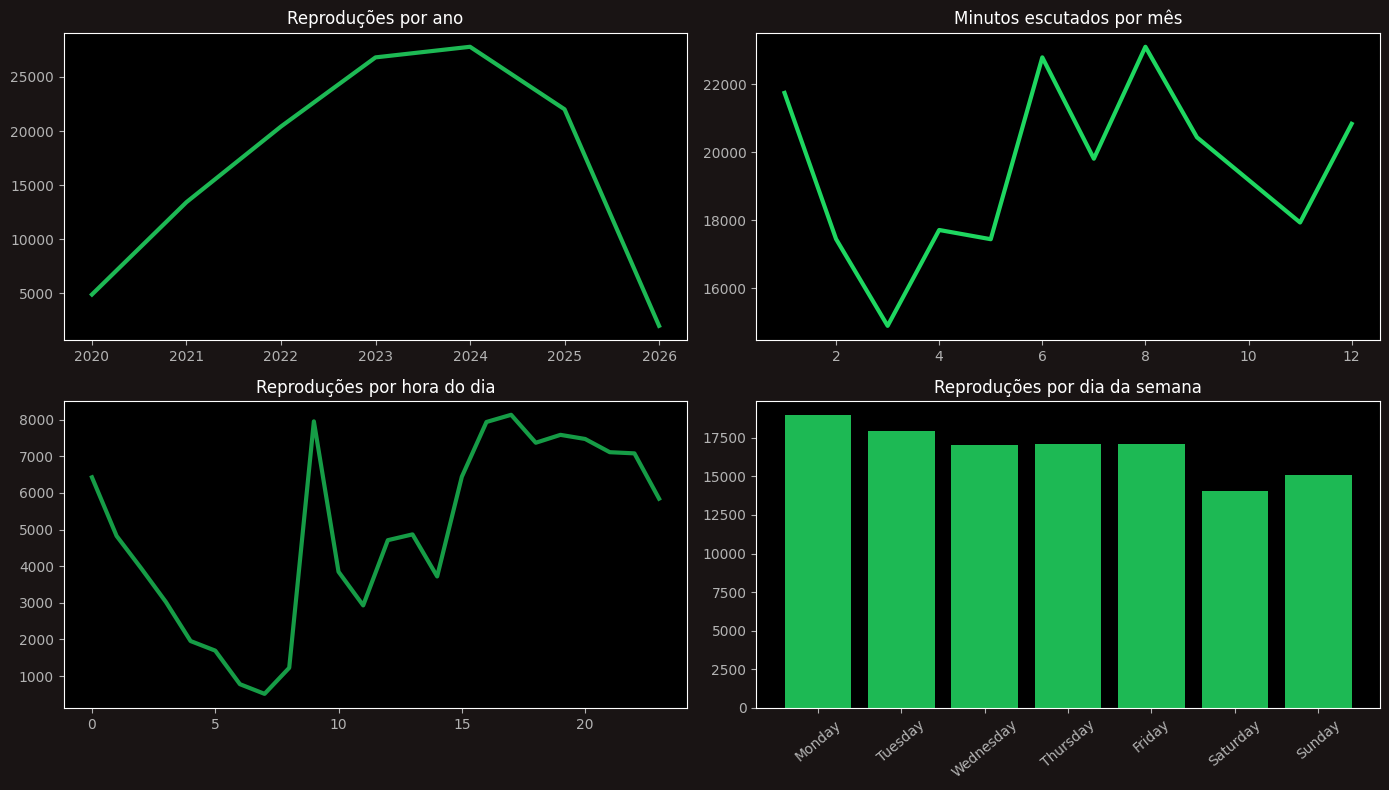

In [48]:
df = df_audio.copy()
df["year"] = df["played_at"].dt.year
df["month"] = df["played_at"].dt.month
df["hour"] = df["played_at"].dt.hour
df["weekday"] = df["played_at"].dt.day_name()

# ordem correta dos dias
weekday_order = [
    "Monday","Tuesday","Wednesday","Thursday",
    "Friday","Saturday","Sunday"
]
df["weekday"] = pd.Categorical(df["weekday"], categories=weekday_order, ordered=True)

# agregações
plays_per_year = df.groupby("year").size()
minutes_per_month = df.groupby("month")["minutes_played"].sum()
plays_per_hour = df.groupby("hour").size()
plays_per_weekday = df.groupby("weekday").size()

# ---------- DASHBOARD ----------
plt.style.use("dark_background")

fig, axes = plt.subplots(2, 2, figsize=(14,8))
fig.patch.set_facecolor("#191414")

# 1 — Ano
axes[0,0].plot(plays_per_year.index, plays_per_year.values, color="#1DB954", linewidth=3)
axes[0,0].set_title("Reproduções por ano", color="white")
axes[0,0].tick_params(colors="#B3B3B3")

# 2 — Mês
axes[0,1].plot(minutes_per_month.index, minutes_per_month.values, color="#1ED760", linewidth=3)
axes[0,1].set_title("Minutos escutados por mês", color="white")
axes[0,1].tick_params(colors="#B3B3B3")

# 3 — Hora
axes[1,0].plot(plays_per_hour.index, plays_per_hour.values, color="#169C46", linewidth=3)
axes[1,0].set_title("Reproduções por hora do dia", color="white")
axes[1,0].tick_params(colors="#B3B3B3")

# 4 — Dia da semana
axes[1,1].bar(plays_per_weekday.index, plays_per_weekday.values, color="#1DB954")
axes[1,1].set_title("Reproduções por dia da semana", color="white")
axes[1,1].tick_params(axis='x', rotation=40, colors="#B3B3B3")
axes[1,1].tick_params(axis='y', colors="#B3B3B3")

plt.tight_layout()
plt.show()


<div style="
    background: linear-gradient(145deg, #121212 0%, #181818 60%, #1DB95422 140%);
    padding: 26px 28px;
    border-radius: 16px;
    margin-top: 20px;
    width: 97%;
    color: #EAEAEA;
    box-shadow: 0 8px 22px rgba(0,0,0,0.55);
">

<div style="
    font-size: 1.9em;
    font-weight: 800;
    color: #1DB954;
    margin-bottom: 16px;
">
    🧾 Arquivo 2 — Dados da Conta
</div>

<!-- Wrapped -->
<div style="margin-bottom:28px;">
    <div style="font-size:1.35em; font-weight:700; color:#FFFFFF;">
        Wrapped2025.json — Métricas Anuais Agregadas
</div>

<div style="margin-top:10px; line-height:1.7;">
    Estatísticas consolidadas do Spotify Wrapped 2025 representando o comportamento musical ao longo do ano.
</div>

<div style="margin-top:12px;">
    <b style="color:#1DB954;">Principais grupos:</b>
    <ul style="margin-top:8px;">
        <li><b>topArtists</b> — artistas mais ouvidos e engajamento</li>
        <li><b>topTracks</b> — músicas mais reproduzidas e tempo total</li>
        <li><b>topPodcasts</b> — consumo de podcasts</li>
        <li><b>yearlyMetrics</b> — tempo anual de escuta</li>
        <li><b>topGenres / topAlbums</b> — diversidade musical</li>
        <li><b>party / listeningAge / clubs</b> — métricas comportamentais</li>
        <li><b>topArtistRace</b> — ranking mensal (análise temporal)</li>
    </ul>
</div>

<div style="
    margin-top:14px;
    padding:12px;
    border-left:5px solid #1DB954;
    background:#1DB95418;
    border-radius:8px;
    font-weight:600;
">
    Ideal para análises descritivas, comparações anuais e enriquecimento de modelos.
</div>
</div>

<!-- Library -->
<div style="margin-bottom:28px;">
<div style="font-size:1.35em; font-weight:700; color:#FFFFFF;">
    YourLibrary.json — Biblioteca Pessoal
</div>

<div style="margin-top:10px; line-height:1.7;">
    Representa o conteúdo salvo pelo usuário: músicas, álbuns e podcasts.
    Diferente do histórico, reflete preferência declarada — não necessariamente consumo real.
</div>

<div style="margin-top:12px;">
    <b style="color:#1DB954;">Estrutura:</b>
    <ul style="margin-top:8px;">
        <li><b>tracks</b> — músicas salvas</li>
        <li><b>albums</b> — álbuns salvos</li>
        <li><b>shows</b> — podcasts seguidos</li>
        <li><b>episodes</b> — episódios salvos</li>
    </ul>
</div>

<div style="
    margin-top:14px;
    padding:12px;
    border-left:5px solid #1DB954;
    background:#1DB95418;
    border-radius:8px;
    font-weight:600;
">
    Permite comparar preferência declarada vs comportamento real de escuta.
</div>
</div>

<!-- Capsule -->
<div>
<div style="font-size:1.35em; font-weight:700; color:#FFFFFF;">
    YourSoundCapsule.json — Resumo Diário
</div>

<div style="margin-top:10px; line-height:1.7;">
    Estatísticas diárias de consumo musical: quantidade de streams,
    tempo ouvido e ranking diário de músicas e artistas.
</div>

<div style="margin-top:12px;">
    <b style="color:#1DB954;">Aplicações:</b>
    <ul style="margin-top:8px;">
        <li>Análise de hábitos diários</li>
        <li>Padrões de consistência</li>
        <li>Comparação entre dias de alto e baixo consumo</li>
    </ul>
</div>
</div>

</div>


In [49]:
# Importando bibliotecas
import json
import pandas as pd


<div style="
    background: linear-gradient(90deg, #121212 0%, #181818 60%, #1DB95455 140%);
    padding:18px 22px;
    border-radius:14px;
    margin-top:35px;
    margin-bottom:10px;
    width:97%;
    color:white;
    border-left:6px solid #1DB954;
">
    <div style="font-size:1.6em; font-weight:800;">
        Wrapped2025.json — Métricas Anuais Agregadas
    </div>
</div>


In [50]:
# Carregando Wrapped2025.json
with open("Wrapped2025.json", "r", encoding="utf-8") as f:
    wrapped = json.load(f)

wrapped.keys()

dict_keys(['topArtists', 'topPodcasts', 'topTracks', 'yearlyMetrics', 'topAlbums', 'topGenres', 'clubs', 'listeningAge', 'party', 'topArtistRace'])

In [51]:
top_artists = wrapped["topArtists"]

df_top_artists_summary = pd.DataFrame([top_artists])
df_top_artists_summary


,topArtistUris,numUniqueArtists,topNPercentileFan,topArtistMsPlayed
0,"[spotify:artist:6XyY86QOPPrYVGvF9ch6wz, spotif...",1332,0.01233,78116417


In [52]:
top_artists = wrapped["topArtists"]

top_artists


{'topArtistUris': ['spotify:artist:6XyY86QOPPrYVGvF9ch6wz',
  'spotify:artist:7Ln80lUS6He07XvHI8qqHH',
  'spotify:artist:3YQKmKGau1PzlVlkL1iodx',
  'spotify:artist:0lAWpj5szCSwM4rUMHYmrr',
  'spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH'],
 'numUniqueArtists': 1332,
 'topNPercentileFan': 0.012330216,
 'topArtistMsPlayed': 78116417}

In [53]:
total_minutes = wrapped["yearlyMetrics"]["totalMsListened"] / 1000 / 60 / 60
print("minutos totais: " + str(total_minutes))


minutos totais: 559.7638758333334


In [54]:
artists_race = []

for artist in wrapped["topArtistRace"]["topArtists"]:
    for month_stat in artist["monthsStats"]:
        artists_race.append({
            "artist_uri": artist["artistUri"],
            "month": month_stat["month"],
            "rank": month_stat["rank"],
            "trail_size": month_stat["trailSize"]
        })

df_artist_race = pd.DataFrame(artists_race)
df_artist_race.head()


,artist_uri,month,rank,trail_size
0,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,JANUARY,5,VERY_LOW
1,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,FEBRUARY,5,VERY_LOW
2,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,MARCH,5,VERY_HIGH
3,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,APRIL,3,VERY_HIGH
4,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,MAY,3,MEDIUM


<div style="
    background: linear-gradient(90deg, #121212 0%, #181818 60%, #1DB95455 140%);
    padding:18px 22px;
    border-radius:14px;
    margin-top:35px;
    margin-bottom:10px;
    width:97%;
    color:white;
    border-left:6px solid #1DB954;
">
    <div style="font-size:1.6em; font-weight:800;">
        YourLibrary.json — Biblioteca Pessoal
    </div>
</div>


In [55]:
with open("YourLibrary.json", "r", encoding="utf-8") as f:
    library = json.load(f)

df_library_tracks = pd.DataFrame(library["tracks"])
df_library_tracks.head()


,artist,album,track,uri
0,G-Nat!on,G-Nat!on: The Complete Collection,Teeth - The Voice Australia 2021 Performance /...,spotify:track:51zLsnv6KcArkp2WtOIsmx


In [56]:
df_library_tracks.info()
# df_library_tracks.describe()
df_library_tracks.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  1 non-null      object
 1   album   1 non-null      object
 2   track   1 non-null      object
 3   uri     1 non-null      object
dtypes: object(4)
memory usage: 164.0+ bytes


Index(['artist', 'album', 'track', 'uri'], dtype='object')

In [57]:
df_shows = pd.DataFrame(library["shows"])
df_episodes = pd.DataFrame(library["episodes"])


<div style="
    background: linear-gradient(90deg, #121212 0%, #181818 60%, #1DB95455 140%);
    padding:18px 22px;
    border-radius:14px;
    margin-top:35px;
    margin-bottom:10px;
    width:97%;
    color:white;
    border-left:6px solid #1DB954;
">
    <div style="font-size:1.6em; font-weight:800;">
        YourSoundCapsule.json — Resumo Diário
    </div>
</div>


In [58]:
with open("YourSoundCapsule.json", "r", encoding="utf-8") as f:
    capsule = json.load(f)

df_capsule = pd.DataFrame(capsule["stats"])
df_capsule.head()


,date,streamCount,secondsPlayed,topTracks,topArtists,topGenres,timeOfDayStats
0,2026-01-19,0,0,[{'name': 'Deixe Me Ir (feat. Pablo Martins) -...,"[{'name': '1Kilo', 'streamCount': 19, 'seconds...",[],NaN
1,2026-01-12,0,0,[{'name': 'Deixe Me Ir (feat. Pablo Martins) -...,"[{'name': '1Kilo', 'streamCount': 16, 'seconds...",[],NaN
2,2026-01-05,0,0,"[{'name': 'Pra Sempre Com Você - Ao Vivo', 'st...","[{'name': 'Jorge & Mateus', 'streamCount': 14,...",[],NaN
3,2026-01,1264,183368,[{'name': 'Deixe Me Ir (feat. Pablo Martins) -...,"[{'name': '1Kilo', 'streamCount': 47, 'seconds...","[{'name': 'funk', 'streamCount': 515, 'seconds...","[{'period': 'late_evening', 'secondsPlayed': 5..."
4,2025-12,1376,205072,"[{'name': 'SEQUÊNCIA FEITICEIRA', 'streamCount...","[{'name': 'PEDRO SAMPAIO', 'streamCount': 58, ...","[{'name': 'brazilian funk', 'streamCount': 484...","[{'period': 'late_evening', 'secondsPlayed': 1..."


In [59]:
rows = []

for day in capsule["stats"]:
    date = day["date"]
    for track in day["topTracks"]:
        rows.append({
            "date": date,
            "track_name": track["name"],
            "stream_count": track["streamCount"],
            "seconds_played": track["secondsPlayed"]
        })

df_capsule_tracks = pd.DataFrame(rows)
df_capsule_tracks.head()


,date,track_name,stream_count,seconds_played
0,2026-01-19,Deixe Me Ir (feat. Pablo Martins) - Acústico 1...,16,3037
1,2026-01-19,Automotivo Mazoquista,15,1475
2,2026-01-19,Midnight Alchemy,15,2734
3,2026-01-19,Posso Até Não Te Dar Flores,11,1711
4,2026-01-19,Novamente Trombei uma Novinha,10,995


In [60]:
# # Configure suas credenciais
# client_id = 'SEU_CLIENT_ID'
# client_secret = 'SEU_CLIENT_SECRET'

# # Autenticação
# # sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, 
# #                                                            client_secret=client_secret))

# sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, 
#                                                            client_secret=client_secret))

# artists_race = []

# for artist in wrapped["topArtistRace"]["topArtists"]:
#     for month_stat in artist["monthsStats"]:
#         artists_race.append({
#             "artist_uri": sp.artist(artist["artistUri"]),
#             "month": month_stat["month"],
#             "rank": month_stat["rank"],
#             "trail_size": month_stat["trailSize"]
#         })

# df_artist_race = pd.DataFrame(artists_race)
# df_artist_race.head()



In [ ]:
import pandas as pd
from spotapi import Artist
import time

api_artist = Artist()
artists_race = []
cache_nomes = {}

for artist in wrapped["topArtistRace"]["topArtists"]:
    artist_id = artist["artistUri"].split(':')[-1]
    
    # 1. Verifica se já buscamos esse artista para ganhar velocidade
    if artist_id not in cache_nomes:
        try:
            data = api_artist.get_artist(artist_id)
            nome_extraido = data['data']['artistUnion']['profile']['name']
            cache_nomes[artist_id] = nome_extraido
            print(f"Sucesso: {artist_id} -> {nome_extraido}")
        except Exception as e:
            print(f"Erro no ID {artist_id}: {e}")
            cache_nomes[artist_id] = f"Desconhecido ({artist_id})"
        
        time.sleep(0.5)

    # 2. Atribui o nome correto do cache para ESTA iteração
    current_artist_name = cache_nomes[artist_id]

    # 3. Preenche a lista com o nome específico deste artista
    for month_stat in artist["monthsStats"]:
        artists_race.append({
            "artist_name": current_artist_name,
            "month": month_stat["month"],
            "rank": month_stat["rank"],
            "trail_size": month_stat["trailSize"]
        })

df_artist_race = pd.DataFrame(artists_race)
print("\nResultado final:")
display(df_artist_race)# Aumentei o head para ver a troca de nomes


Sucesso: 6qqNVTkY8uBg9cP3Jd7DAH -> Billie Eilish
Sucesso: 6XyY86QOPPrYVGvF9ch6wz -> Linkin Park
Sucesso: 0lAWpj5szCSwM4rUMHYmrr -> Måneskin
Sucesso: 3YQKmKGau1PzlVlkL1iodx -> Twenty One Pilots
Sucesso: 7Ln80lUS6He07XvHI8qqHH -> Arctic Monkeys

Resultado final:


,artist_name,month,rank,trail_size
0,Billie Eilish,JANUARY,5,VERY_LOW
1,Billie Eilish,FEBRUARY,5,VERY_LOW
2,Billie Eilish,MARCH,5,VERY_HIGH
3,Billie Eilish,APRIL,3,VERY_HIGH
4,Billie Eilish,MAY,3,MEDIUM
5,Billie Eilish,JUNE,4,MEDIUM
6,Billie Eilish,JULY,5,LOW
7,Billie Eilish,AUGUST,5,LOW
8,Billie Eilish,SEPTEMBER,5,MEDIUM
9,Billie Eilish,OCTOBER,5,MEDIUM
